In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp

In [26]:
review_row = pd.read_csv('category_Gusuk_Review_Final - 네이버리뷰.csv')
review = review_row.copy()
review=review[["Attraction","Good_Point","Selected_People"]]
review.head()


,Attraction,Good_Point,Selected_People
0,동대문역사문화공원,뷰가 좋아요,22.0
1,동대문역사문화공원,관리가 잘 되어있어요,21.0
2,동대문역사문화공원,볼거리가 많아요,14.0
3,동대문역사문화공원,사진이 잘 나와요,12.0
4,동대문역사문화공원,산책로가 잘 되어있어요,12.0


In [27]:
category_row = pd.read_csv('Category_Gusuk_Review_Final - 카테고리_구석.csv')
category = category_row.copy()
category=category[["Attraction","Category",	"Address","Participants"]]
category.head()

,Attraction,Category,Address,Participants
0,동대문역사문화공원,관광,서울특별시 중구 신당동 853,56
1,서울식물원,관광,서울특별시 강서구 마곡동로 161 서울식물원,"5,204"
2,N서울타워,관광,서울특별시 용산구 남산공원길 105,"5,100"
3,서울숲,관광,서울특별시 성동구 뚝섬로 273,258
4,경복궁,관광,서울특별시 종로구 사직로 161 경복궁,"1,202"


In [28]:
total_info = pd.merge(review, category, on = 'Attraction', how = 'inner')
total_info = total_info[total_info['Category'].isin(['관광', '음식'])]
total_info

,Attraction,Good_Point,Selected_People,Category,Address,Participants
0,동대문역사문화공원,뷰가 좋아요,22.0,관광,서울특별시 중구 신당동 853,56
1,동대문역사문화공원,관리가 잘 되어있어요,21.0,관광,서울특별시 중구 신당동 853,56
2,동대문역사문화공원,볼거리가 많아요,14.0,관광,서울특별시 중구 신당동 853,56
3,동대문역사문화공원,사진이 잘 나와요,12.0,관광,서울특별시 중구 신당동 853,56
4,동대문역사문화공원,산책로가 잘 되어있어요,12.0,관광,서울특별시 중구 신당동 853,56
...,...,...,...,...,...,...
17122,h450,아늑해요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260
17123,h450,메뉴 구성이 알차요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260
17124,h450,건강한 맛이에요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260
17125,h450,음료가 맛있어요,1.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260


In [29]:
total_info['Attraction'].nunique()

802

In [30]:
type_food_row = pd.read_csv('food_type_v2.csv')
type_food = type_food_row.copy()
type_food = type_food[['Attraction','type']]
type_food.head()

,Attraction,type
0,채그로,cafe
1,소소한 풍경,korean
2,마복림할머니집,korean
3,뮤직컴플렉스 서울,cafe
4,또순이네집,korean


In [31]:
type_tour_row = pd.read_csv('tour_type_v2.csv')
type_tour = type_tour_row.copy()
type_tour = type_tour[['Attraction','type']]
type_tour.head()

,Attraction,type
0,동대문역사문화공원,experience
1,서울식물원,nature
2,N서울타워,theme
3,서울숲,nature
4,경복궁,history


In [32]:
type = pd.concat([type_tour, type_food], axis=0)
type

,Attraction,type
0,동대문역사문화공원,experience
1,서울식물원,nature
2,N서울타워,theme
3,서울숲,nature
4,경복궁,history
...,...,...
446,해담채 삼성점,korean
447,까사빠보,japanese
448,포포인츠 바이 쉐라톤 조선 서울역 더 이터리,etc
449,오양회참치 광화문본점,korean


In [33]:
info = pd.merge(type, total_info, on='Attraction', how='inner')
info

,Attraction,type,Good_Point,Selected_People,Category,Address,Participants
0,동대문역사문화공원,experience,뷰가 좋아요,22.0,관광,서울특별시 중구 신당동 853,56
1,동대문역사문화공원,experience,관리가 잘 되어있어요,21.0,관광,서울특별시 중구 신당동 853,56
2,동대문역사문화공원,experience,볼거리가 많아요,14.0,관광,서울특별시 중구 신당동 853,56
3,동대문역사문화공원,experience,사진이 잘 나와요,12.0,관광,서울특별시 중구 신당동 853,56
4,동대문역사문화공원,experience,산책로가 잘 되어있어요,12.0,관광,서울특별시 중구 신당동 853,56
...,...,...,...,...,...,...,...
15702,h450,west,아늑해요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260
15703,h450,west,메뉴 구성이 알차요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260
15704,h450,west,건강한 맛이에요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260
15705,h450,west,음료가 맛있어요,1.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260


In [34]:
info['Attraction'].nunique()

801

### 음식 선택자 속성 분류

In [35]:
# category_map_food = {
#     "시설 및 분위기": ["뷰가 좋아요", "인테리어가 멋져요", "사진이 잘 나와요", "경관이 독특해요",
#                     "좌석이 편해요", "매장이 넓어요", "룸이 잘 되어있어요", "야외 공간이 멋져요",
#                     "산책로가 잘 되어있어요", "피크닉하기 좋아요", "편의시설이 잘 되어있어요", "공간이 넓어요",
#                     "붐비지 않아요", "방문객이 많아요",
#                     "특별한 날 가기 좋아요", "컨셉이 독특해요", "테마가 재미있어요", "아늑해요",
#                     "차분한 분위기에요", "오래 머무르기 좋아요", "조용히 쉬기 좋아요", "혼밥하기 좋아요", "혼술하기 좋아요",
#                     "파티하기 좋아요", "라이브공연이 훌륭해요", "음악이 좋아요", "대화하기 좋아요", "집중하기 좋아요",
#                     "화장실이 깨끗해요", "매장이 청결해요", "환기가 잘 돼요", "관리가 잘 되어있어요",
#                     "단체모임 하기 좋아요", "아이와 가기 좋아요", "부모도 쉬기 좋아요", "읽을만한 책이 많아요",
#                     "볼거리가 많아요", "반려동물과 가기 좋아요", "선물하기 좋아요",
#                     "놀거리가 많아요", "체험 프로그램이 많아요",
#                     "대중교통이 편해요", "근처에 갈 곳이 많아요", "주차하기 편해요" ],

#     "음식의 속성": ["커피가 맛있어요", "음료가 맛있어요", "디저트가 맛있어요", "차가 맛있어요",
#                     "재료가 신선해요", "건강한 맛이에요", "신선해요", "원산지 표시가 명확해요",
#                     "음식이 맛있어요", "양이 많아요", "고기 질이 좋아요", "잡내가 적어요", "빵이 맛있어요", "기본 안주가 좋아요",
#                     "특별한 메뉴가 있어요", "반찬이 잘 나와요", "술이 다양해요",
#                     "코스가 길어요", "먹거리가 풍부해요", "샐러드바가 잘 되어있어요", "부위가 다양해요", "종류가 다양해요",
#                     "향신료가 강하지 않아요","현지 맛에 가까워요", "비주얼이 좋아요"],

#     "가격 및 가치": ["가성비가 좋아요", "코스요리가 알차요", "세트 구성이 알차요", "비싼 만큼 가치있어요",
#                      "가격이 합리적이에요", "메뉴 구성이 알차요"],

#     "서비스" : ["친절해요", "음식이 빨리 나와요", "포장이 깔끔해요", "직접 잘 구워줘요", "주문제작을 잘해줘요", "안전하게 관리해요"],

# }

# 편의(시설) / 매력도(속성과 분위기) / 만족도(가격 및 가치 + 서비스)

In [36]:
# 실행 필수
info_food = info[info['Category'] == '음식']

# df에 속성을 업로
def update_categories(info_food, category_map_food):
    for category, keywords in category_map_food.items():
        for keyword in keywords:
            info_food.loc[info_food['Good_Point'].str.contains(keyword), 'Category_Map'] = category
    return info_food

info_food = update_categories(info_food, category_map_food)
info_food

NameError: name 'category_map_food' is not defined

In [40]:
# 단순 확인용
# all_temp_tour = all[all['Good_Point'] == '관광']
# all_temp_tour

,Attraction,type,Good_Point,Selected_People,Category,Address,Participants
0,동대문역사문화공원,experience,뷰가 좋아요,22.0,관광,서울특별시 중구 신당동 853,56
1,동대문역사문화공원,experience,관리가 잘 되어있어요,21.0,관광,서울특별시 중구 신당동 853,56
2,동대문역사문화공원,experience,볼거리가 많아요,14.0,관광,서울특별시 중구 신당동 853,56
3,동대문역사문화공원,experience,사진이 잘 나와요,12.0,관광,서울특별시 중구 신당동 853,56
4,동대문역사문화공원,experience,산책로가 잘 되어있어요,12.0,관광,서울특별시 중구 신당동 853,56
...,...,...,...,...,...,...,...
5031,광야 서울,experience,A/S가 세심해요,8.0,관광,서울 성동구 왕십리로 83-21,437
5032,광야 서울,experience,신상품이 많아요,8.0,관광,서울 성동구 왕십리로 83-21,437
5033,광야 서울,experience,선물하기 좋아요,5.0,관광,서울 성동구 왕십리로 83-21,437
5034,광야 서울,experience,고급스러워요,4.0,관광,서울 성동구 왕십리로 83-21,437


In [134]:
# 단순 확인용
# all_temp_tour_with_child = all_temp_tour[all_temp_tour['Good_Point'].str.contains('아이')]
# all_temp_tour_with_child

,Attraction,Category,type,type2,Category_Map,Good_Point,Selected_People,Participants
25,서울식물원,관광,nature,nature,활동 및 즐길거리,아이와 가기 좋아요,62.0,"5,204"
42,N서울타워,관광,theme,theme,활동 및 즐길거리,아이와 가기 좋아요,69.0,"5,100"
65,서울숲,관광,nature,nature,활동 및 즐길거리,아이와 가기 좋아요,17.0,258
79,경복궁,관광,history,history,활동 및 즐길거리,아이와 가기 좋아요,210.0,"1,202"
96,롯데월드 어드벤처,관광,theme,theme,활동 및 즐길거리,아이와 가기 좋아요,4569.0,"15,214"
...,...,...,...,...,...,...,...,...
4621,문래근린공원,관광,history,culture,활동 및 즐길거리,아이와 가기 좋아요,4.0,15
4778,암사선사유적박물관,관광,culture,culture,활동 및 즐길거리,아이와 가기 좋아요,65.0,178
4820,헬로애니멀,관광,experience,experience,활동 및 즐길거리,아이와 가기 좋아요,14.0,254
4950,은평역사한옥박물관,관광,culture,culture,활동 및 즐길거리,아이와 가기 좋아요,33.0,381


In [195]:
# 2024-05-31

# category_map_tour = {
#     "시설 및 편의성": [
#         "관리가 잘 되어있어요", "편의시설이 잘 되어있어요", "화장실이 깨끗해요",
#         "대중교통이 편해요", "주차하기 편해요", "샤워실이 잘 되어있어요", "숙박하기 좋아요",
#         "시설이 깔끔해요", "부대시설이 잘 되어있어요", "공용시설 관리가 잘돼요", "온수가 잘 나와요",
#         "매너타임이 잘 지켜져요", "개수대가 잘 되어있어요", "냉난방이 잘돼요", "전기 사용이 편해요",
#         "마트 이용이 편해요", "취사시설이 잘 되어있어요", "방음이 잘돼요", "침구가 좋아요",
#         "보안시설이 잘 되어있어요", "대여장비 상태가 좋아요", "휴게공간이 잘 되어있어요",
#         "대기공간이 잘 되어있어요", "기구가 청결해요", "반납이 편해요", "취식 공간이 잘 되어있어요",
#         "파우더룸이 잘 되어있어요", "연습공간이 잘 되어있어요", "수면실이 잘 되어있어요",
#         "노천탕이 잘 되어있어요", "탕이 넓어요", "수질 관리가 잘돼요", "셔틀버스가 잘 되어있어요",
#         "사이트 간격이 넓어요", "벌레 걱정 없어요", "화장실이 잘 되어있어요", "규모가 커요", "반려동물과 가기 좋아요"
#         ,"카페 같은 분위기에요", '방문객이 많아요','공간이 넓어요','전시 구성이 알차요', '깨끗해요','바비큐 해먹기 좋아요',
#         '그늘이 많아요','물이 따뜻해요','수심이 다양해요','물이 깨끗해요', '책 읽기 쾌적해요', '대화하기 좋아요', '집중하기 좋아요',
#         '조용히 쉬기 좋아요', '원하는 책을 찾기 쉬워요', '오래 머무르기 좋아요', '좌석이 편해요', '최신 장비를 사용해요',
#         '행사 상품이 다양해요', '배달 시스템이 편리해요','분위기가 편안해요','매장이 청결해요',
#         "근처에 갈 곳이 많아요", "대중교통이 편해요", "근처에 식당이 많아요"
#     ],
    
#     "활동 및 즐길거리": [
#         "볼거리가 많아요", "체험 프로그램이 다양해요", "먹거리가 풍부해요", "놀이기구가 다양해요",
#         "야시장이 잘 되어있어요", "물놀이하기 좋아요", "파티하기 좋아요", "공연이 재밌어요",
#         "강습 받기 좋아요", "책 종류가 다양해요", "특이한 찜질방이 있어요",
#         "놀거리가 많아요", "야외에서 놀기 좋아요", "커플로 맞추기 좋아요", "즐길 거리가 많아요", "고기 질이 좋아요",
#         "그늘집이 잘 되어있어요", "맞춤 지도를 잘해줘요", "스타일 추천을 잘해줘요", "자연스럽게 연출해줘요",
#         "세트장 구성이 다양해요", "다양하게 연출하기 좋아요",
#         "프로그램이 다양해요", "초보자에게도 적합해요","산책로가 잘 되어있어요", "신기한 식물이 많아요",
#         "피크닉하기 좋아요","슬로프가 길어요", "아이와 가기 좋아요", "유익해요", "물놀이하기 좋아요", "재미있는 테마가 많아요",
#         "스토리가 탄탄해요", "문제가 신선해요", '컨셉이 독특해요','전시 테마가 재밌어요', '사진 컨셉이 다양해요', '특별한 날 가기 좋아요'
#     ],
    
#     "경관 및 사진": [
#         "뷰가 좋아요", "사진이 잘 나와요", "야경이 멋져요", "경관이 독특해요", "자연 경관이 좋아요",
#         "야외 공간이 멋져요", "채광이 좋아요", "인테리어가 멋져요", "독특한 디자인이 많아요",
#         "아기자기해요", "고급스러워요", "예쁜 소품이 많아요", "트렌디해요", "아늑해요",
#         "카페 같은 분위기에요", "소품이 다양해요"
#     ],
    
#     "서비스": [
#         "친절해요", "안전하게 관리해요", "추천을 잘해줘요", "예약이 편리해요", "설명이 잘 되어있어요",
#         "상담이 자세해요", "손이 빨라요", "관리법을 잘 알려줘요", "맞춤 케어를 잘해줘요",
#         "과도한 권유가 없어요", "관리 효과가 좋아요", "가격 안내가 명확해요", "대화가 즐거워요",
#         "필요한 대화만 오가요", "서비스가 좋아요", "픽업서비스가 편해요", "A/S가 세심해요",
#         "설명이 자세해요", "배송 시스템이 편리해요", "할인/적립을 잘 챙겨줘요", "맞춤 제작을 잘해줘요", "유익해요", "선생님이 열정적이에요",
#         "수업이 체계적이에요", "세신사의 실력이 좋아요", "학생과 소통을 잘해요", '포장이 정성스러워요',
#         '주문제작을 잘해줘요','보정을 꼼꼼하게 해줘요', '캐디의 진행이 매끄러워요', '예약 시간을 잘 지켜요',
#         '거리 측정을 잘해줘요', '검안이 꼼꼼해요', '시술이 꼼꼼해요', '원하는 스타일로 잘해줘요', '자연스러워요',
#         '선생님 실력이 좋아요','소수정예에요'
#     ],
    
#     "가격 및 가치": [
#         "가격이 합리적이에요", "가성비가 좋아요", "품질이 좋아요", "비싼 만큼 가치있어요"
#     ],
    
#     "쇼핑 관련": [
#         "특색 있는 제품이 많아요", "매장이 넓어요", "신상품이 많아요", "사이즈가 다양해요",
#         "옷이 예뻐요", "옷 관리가 잘 되어있어요", "옷이 다양해요", "독특한 의상이 많아요",
#         "키덜트족에게 좋아요", "좋은 제품을 사용해요", "과채가 신선해요",
#         "종류가 다양해요", "베스트셀러가 많아요", "신간이 빨리 들어와요", '상품이 다양해요', '선물하기 좋아요','트렌디한 상품이 많아요'
#         , "맞춤 제작을 잘해요","예쁜 아기 의상이 많아요", "독특한 책이 많아요"
#     ],
    
#     "기타": [
#         "코스가 길어요", "혼밥하기 좋아요","코스가 변별력 있어요",
#         "필드 상태가 좋아요", "클럽하우스가 잘 되어있어요",'붐비지 않아요','대기시간이 짧아요', '재료가 신선해요', '피팅이 자유로워요'
#     ]
# }

## 선택자 수정 2024_06_04

In [94]:
#시설 및 분위기(인테리어 청결 규모 시설에 대한 구성) / 편의성(접근성,위치) / 활동(프로그램) / 서비스 / 가격(문화나 쇼핑)
# "숙박하기 좋아요" - 제거

# 하나의 장소에 문장 리뷰에다가 토큰화
category_map_tour = {
"편의" : ["관리가 잘 되어있어요", "화장실이 깨끗해요", "샤워실이 잘 되어있어요", "시설이 깔끔해요",
                    "온수가 잘 나와요", "공용시설 관리가 잘돼요", "부대시설이 잘 되어있어요", "개수대가 잘 되어있어요", "냉난방이 잘돼요", "취사시설이 잘 되어있어요", 
                    "방음이 잘돼요", "침구가 좋아요", "보안시설이 잘 되어있어요", "대여장비 상태가 좋아요",
                    "휴게공간이 잘 되어있어요", "대기공간이 잘 되어있어요", "전기 사용이 편해요",
                    "기구가 청결해요", "반납이 편해요", "취식 공간이 잘 되어있어요",
                    "파우더룸이 잘 되어있어요", "연습공간이 잘 되어있어요",
                    "수면실이 잘 되어있어요", "노천탕이 잘 되어있어요", "탕이 넓어요", 
                    "수질 관리가 잘돼요", "사이트 간격이 넓어요", "벌레 걱정 없어요", 
                    "화장실이 잘 되어있어요", "규모가 커요", "공간이 넓어요", "깨끗해요", 
                    "바비큐 해먹기 좋아요", "그늘이 많아요", "물이 따뜻해요", "수심이 다양해요",
                    "물이 깨끗해요", "좌석이 편해요", "최신 장비를 사용해요", "행사 상품이 다양해요",
                    "매장이 청결해요", "매장이 넓어요", "코스가 길어요", "코스가 변별력 있어요", "필드 상태가 좋아요", "클럽하우스가 잘 되어있어요",
                    "물놀이하기 좋아요", "특이한 찜질방이 있어요", "먹거리가 풍부해요", "그늘집이 잘 되어있어요", "세트장 구성이 다양해요",
                    "슬로프가 길어요", "물놀이하기 좋아요", "야외 공간이 멋져요", "인테리어가 멋져요", "소품이 다양해요", "종류가 다양해요",
                    "맞춤 제작을 잘해요", "예쁜 아기 의상이 많아요","편의시설이 잘 되어있어요", "대중교통이 편해요", "주차하기 편해요" , "마트 이용이 편해요","마트 이용이 편해요","셔틀버스가 잘 되어있어요",
                    "근처에 갈 곳이 많아요", "대중교통이 편해요", "근처에 식당이 많아요" ,"산책로가 잘 되어있어요", '배달 시스템이 편리해요'
],

"매력도" : ["전시 구성이 알차요", "볼거리가 많아요", "체험 프로그램이 다양해요", "놀이기구가 다양해요",
              "공연이 재밌어요", "강습 받기 좋아요", "책 종류가 다양해요", "놀거리가 많아요", "야외에서 놀기 좋아요",
                "커플로 맞추기 좋아요", "즐길 거리가 많아요", "프로그램이 다양해요", "재미있는 테마가 많아요",
                "스토리가 탄탄해요", "문제가 신선해요", "전시 테마가 재밌어요", "야시장이 잘 되어있어요", "컨셉이 독특해요", "사진 컨셉이 다양해요", "특별한 날 가기 좋아요",
                    "자연 경관이 좋아요", "뷰가 좋아요", "사진이 잘 나와요", "야경이 멋져요", "경관이 독특해요",
                    "매너타임이 잘 지켜져요", "책 읽기 쾌적해요","대화하기 좋아요", "집중하기 좋아요",
                    "조용히 쉬기 좋아요", "독특한 책이 많아요","카페 같은 분위기에요", "방문객이 많아요", "분위기가 편안해요", "피크닉하기 좋아요", "붐비지 않아요", "독특한 디자인이 많아요",
                    "아기자기해요", "고급스러워요", "예쁜 소품이 많아요", "트렌디해요", "아늑해요", "오래 머무르기 좋아요", "아이와 가기 좋아요",
                    "카페 같은 분위기에요", "키덜트족에게 좋아요", "파티하기 좋아요", "혼밥하기 좋아요","대기시간이 짧아요","유익해요",
                    "신기한 식물이 많아요", "초보자에게도 적합해요", 
                    "다양하게 연출하기 좋아요", "채광이 좋아요", "신상품이 많아요", "사이즈가 다양해요", "옷이 예뻐요", "옷 관리가 잘 되어있어요", "옷이 다양해요", "특색 있는 제품이 많아요", 
                    "독특한 의상이 많아요", "좋은 제품을 사용해요", "과채가 신선해요", "베스트셀러가 많아요",
                    "신간이 빨리 들어와요", "상품이 다양해요", "선물하기 좋아요", "트렌디한 상품이 많아요",
],

"만족도" : ["피팅이 자유로워요", "맞춤 지도를 잘해줘요", "스타일 추천을 잘해줘요", "자연스럽게 연출해줘요",
         "친절해요", "안전하게 관리해요", "추천을 잘해줘요", "예약이 편리해요", "설명이 잘 되어있어요",
            "상담이 자세해요", "손이 빨라요", "관리법을 잘 알려줘요", "맞춤 케어를 잘해줘요", "과도한 권유가 없어요",
            "관리 효과가 좋아요", "가격 안내가 명확해요", "대화가 즐거워요", "필요한 대화만 오가요",
            "서비스가 좋아요", "픽업서비스가 편해요", "A/S가 세심해요", "설명이 자세해요", "배송 시스템이 편리해요",
            "할인/적립을 잘 챙겨줘요", "맞춤 제작을 잘해줘요", "유익해요", "선생님이 열정적이에요",
            "수업이 체계적이에요", "세신사의 실력이 좋아요", "학생과 소통을 잘해요", "포장이 정성스러워요",
            "주문제작을 잘해줘요", "보정을 꼼꼼하게 해줘요", "캐디의 진행이 매끄러워요", "예약 시간을 잘 지켜요",
            "거리 측정을 잘해줘요", "검안이 꼼꼼해요", "시술이 꼼꼼해요", "원하는 스타일로 잘해줘요", "자연스러워요",
 "선생님 실력이 좋아요","가격이 합리적이에요", "가성비가 좋아요", "품질이 좋아요", "비싼 만큼 가치있어요", "소수정예에요", "반려동물과 가기 좋아요",
                    "재료가 신선해요" ,"원하는 책을 찾기 쉬워요", 
                    "고기 질이 좋아요"]
}

In [95]:
논문_관광지_선택속성 = ['기반시설', '관광자원', '유명함','접근성', '독특성', '탈출', '휴식', '자기실현', 
               '치료', '건강','명성추구', '탐험추구','친지방문', '문화 적 탐험', '밤 생활 즐김',
'교통시설', '음식의 다양함과 질','친근감', '숙소시설', '개인적안정', '가격','쇼핑하기 좋은 곳', 
'문화적 자원','관광지 이미지와 기대', '환경적 안정과 질','가족 관광 적합성', '여행비용', '안전 및 위생',
'교통접근성', '관광시설', '관광매력성','서비스 품질', '접근성', '물리적 속성', '지각된 위험','가격 적정성',
'광고 및 홍보 적정성', '구전 효과성', '관광 인프라 적정성', '자원 적정성','편의 및 접근성','안락성', '서비스성', 
'소비성', '매력성', '체험기반', '비용', '편의', '환경', '서비스','매력성', '독특성', '편의성','문화적 이미지',
'환경의 편의성','관광지 운영 프로그램', '주민의 친절함','편의성', '지역성', '매력성', '활동성', '접근 및 친절성',
'매력성', '경험성', '흥미성', '편의성','관광형태', '관광지 매력성', '관광유형','동행자유형', '접근성', '숙박부대시설','프로그램',
'서비스품질', '지각된 위험','물리적 속성', '접근성','편의 및 휴게시설', '매력성', '안전 및 청결도','학습',
'체험', '탐방', '쇼핑', '휴양', '시설','매력성', '연계성', '안정성', '편의성',
'편의성', '환대서비스', '오락성', '역사문화성', '프로그램','매력성', '역사문화성', '프로그램', '편의성',
'접근성', '서비스품질','접근 및 편리성', '오락성', '관광자원', '매력성','물리적 속성', '프로그램', '서비스품질', '접근성']

### 논문 선택자 속성 추출

In [96]:
from collections import Counter

select_counter = Counter(논문_관광지_선택속성)

In [97]:
select_counter_1 = pd.DataFrame(select_counter.items(), columns=['name','counter'])
select_counter_1

,name,counter
0,기반시설,1
1,관광자원,2
2,유명함,1
3,접근성,6
4,독특성,2
...,...,...
75,안정성,1
76,환대서비스,1
77,오락성,2
78,역사문화성,2


In [98]:
select_counter_1.sort_values(by='counter', ascending=False)

,name,counter
43,매력성,8
3,접근성,6
49,편의성,6
64,프로그램,4
32,물리적 속성,3
...,...,...
26,여행비용,1
25,가족 관광 적합성,1
24,환경적 안정과 질,1
23,관광지 이미지와 기대,1


In [99]:
select_counter_1[select_counter_1['counter'] >= 3]

,name,counter
3,접근성,6
32,물리적 속성,3
43,매력성,8
49,편의성,6
64,프로그램,4
65,서비스품질,3


In [100]:
df_temp = pd.DataFrame(논문_관광지_선택속성, columns=['name'])
df_dup = df_temp['name'].unique().tolist()
df_dup_2 = pd.DataFrame(df_dup, columns=['name_dup'])

In [101]:
df_dup_2.tail(50)  
# 편의성, 매력성, 서비스, 경관

,name_dup
30,관광매력성
31,서비스 품질
32,물리적 속성
33,지각된 위험
34,가격 적정성
35,광고 및 홍보 적정성
36,구전 효과성
37,관광 인프라 적정성
38,자원 적정성
39,편의 및 접근성


### 2024-06-04 여기부터 실행

In [160]:
info_tour = info[info['Category'] == '관광']

# df에 속성을 업로
def update_categories(info_tour, category_map_tour):
    for category, keywords in category_map_tour.items():
        for keyword in keywords:
            info_tour.loc[info_tour['Good_Point'].str.contains(keyword), 'Category_Map'] = category
    return info_tour

info_tour = update_categories(info_tour, category_map_tour)
info_tour

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_24408\3457364920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_tour.loc[info_tour['Good_Point'].str.contains(keyword), 'Category_Map'] = category


,Attraction,type,Good_Point,Selected_People,Category,Address,Participants,Category_Map
0,동대문역사문화공원,experience,뷰가 좋아요,22.0,관광,서울특별시 중구 신당동 853,56,매력도
1,동대문역사문화공원,experience,관리가 잘 되어있어요,21.0,관광,서울특별시 중구 신당동 853,56,편의
2,동대문역사문화공원,experience,볼거리가 많아요,14.0,관광,서울특별시 중구 신당동 853,56,매력도
3,동대문역사문화공원,experience,사진이 잘 나와요,12.0,관광,서울특별시 중구 신당동 853,56,매력도
4,동대문역사문화공원,experience,산책로가 잘 되어있어요,12.0,관광,서울특별시 중구 신당동 853,56,편의
...,...,...,...,...,...,...,...,...
5031,광야 서울,experience,A/S가 세심해요,8.0,관광,서울 성동구 왕십리로 83-21,437,만족도
5032,광야 서울,experience,신상품이 많아요,8.0,관광,서울 성동구 왕십리로 83-21,437,매력도
5033,광야 서울,experience,선물하기 좋아요,5.0,관광,서울 성동구 왕십리로 83-21,437,매력도
5034,광야 서울,experience,고급스러워요,4.0,관광,서울 성동구 왕십리로 83-21,437,매력도


In [161]:
info_tour = info_tour[info_tour['Category_Map'] != 'nan']
info_tour

,Attraction,type,Good_Point,Selected_People,Category,Address,Participants,Category_Map
0,동대문역사문화공원,experience,뷰가 좋아요,22.0,관광,서울특별시 중구 신당동 853,56,매력도
1,동대문역사문화공원,experience,관리가 잘 되어있어요,21.0,관광,서울특별시 중구 신당동 853,56,편의
2,동대문역사문화공원,experience,볼거리가 많아요,14.0,관광,서울특별시 중구 신당동 853,56,매력도
3,동대문역사문화공원,experience,사진이 잘 나와요,12.0,관광,서울특별시 중구 신당동 853,56,매력도
4,동대문역사문화공원,experience,산책로가 잘 되어있어요,12.0,관광,서울특별시 중구 신당동 853,56,편의
...,...,...,...,...,...,...,...,...
5031,광야 서울,experience,A/S가 세심해요,8.0,관광,서울 성동구 왕십리로 83-21,437,만족도
5032,광야 서울,experience,신상품이 많아요,8.0,관광,서울 성동구 왕십리로 83-21,437,매력도
5033,광야 서울,experience,선물하기 좋아요,5.0,관광,서울 성동구 왕십리로 83-21,437,매력도
5034,광야 서울,experience,고급스러워요,4.0,관광,서울 성동구 왕십리로 83-21,437,매력도


In [162]:
info_tour = info_tour.dropna(axis=0)
info_tour

,Attraction,type,Good_Point,Selected_People,Category,Address,Participants,Category_Map
0,동대문역사문화공원,experience,뷰가 좋아요,22.0,관광,서울특별시 중구 신당동 853,56,매력도
1,동대문역사문화공원,experience,관리가 잘 되어있어요,21.0,관광,서울특별시 중구 신당동 853,56,편의
2,동대문역사문화공원,experience,볼거리가 많아요,14.0,관광,서울특별시 중구 신당동 853,56,매력도
3,동대문역사문화공원,experience,사진이 잘 나와요,12.0,관광,서울특별시 중구 신당동 853,56,매력도
4,동대문역사문화공원,experience,산책로가 잘 되어있어요,12.0,관광,서울특별시 중구 신당동 853,56,편의
...,...,...,...,...,...,...,...,...
5031,광야 서울,experience,A/S가 세심해요,8.0,관광,서울 성동구 왕십리로 83-21,437,만족도
5032,광야 서울,experience,신상품이 많아요,8.0,관광,서울 성동구 왕십리로 83-21,437,매력도
5033,광야 서울,experience,선물하기 좋아요,5.0,관광,서울 성동구 왕십리로 83-21,437,매력도
5034,광야 서울,experience,고급스러워요,4.0,관광,서울 성동구 왕십리로 83-21,437,매력도


In [164]:
category_map = pd.concat([info_tour,info_food], axis = 0)
category_map

,Attraction,type,Good_Point,Selected_People,Category,Address,Participants,Category_Map
0,동대문역사문화공원,experience,뷰가 좋아요,22.0,관광,서울특별시 중구 신당동 853,56,매력도
1,동대문역사문화공원,experience,관리가 잘 되어있어요,21.0,관광,서울특별시 중구 신당동 853,56,편의
2,동대문역사문화공원,experience,볼거리가 많아요,14.0,관광,서울특별시 중구 신당동 853,56,매력도
3,동대문역사문화공원,experience,사진이 잘 나와요,12.0,관광,서울특별시 중구 신당동 853,56,매력도
4,동대문역사문화공원,experience,산책로가 잘 되어있어요,12.0,관광,서울특별시 중구 신당동 853,56,편의
...,...,...,...,...,...,...,...,...
15702,h450,west,아늑해요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260,NaN
15703,h450,west,메뉴 구성이 알차요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260,NaN
15704,h450,west,건강한 맛이에요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260,NaN
15705,h450,west,음료가 맛있어요,1.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260,NaN


In [165]:
category_map = category_map[["Attraction","Good_Point","Category_Map"]]
category_map[:]

,Attraction,Good_Point,Category_Map
0,동대문역사문화공원,뷰가 좋아요,매력도
1,동대문역사문화공원,관리가 잘 되어있어요,편의
2,동대문역사문화공원,볼거리가 많아요,매력도
3,동대문역사문화공원,사진이 잘 나와요,매력도
4,동대문역사문화공원,산책로가 잘 되어있어요,편의
...,...,...,...
15702,h450,아늑해요,NaN
15703,h450,메뉴 구성이 알차요,NaN
15704,h450,건강한 맛이에요,NaN
15705,h450,음료가 맛있어요,NaN


In [166]:
all = pd.merge(info, category_map, how = 'left')
all

,Attraction,type,Good_Point,Selected_People,Category,Address,Participants,Category_Map
0,동대문역사문화공원,experience,뷰가 좋아요,22.0,관광,서울특별시 중구 신당동 853,56,매력도
1,동대문역사문화공원,experience,관리가 잘 되어있어요,21.0,관광,서울특별시 중구 신당동 853,56,편의
2,동대문역사문화공원,experience,볼거리가 많아요,14.0,관광,서울특별시 중구 신당동 853,56,매력도
3,동대문역사문화공원,experience,사진이 잘 나와요,12.0,관광,서울특별시 중구 신당동 853,56,매력도
4,동대문역사문화공원,experience,산책로가 잘 되어있어요,12.0,관광,서울특별시 중구 신당동 853,56,편의
...,...,...,...,...,...,...,...,...
17064,h450,west,아늑해요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260,NaN
17065,h450,west,메뉴 구성이 알차요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260,NaN
17066,h450,west,건강한 맛이에요,2.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260,NaN
17067,h450,west,음료가 맛있어요,1.0,음식,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,260,NaN


In [169]:
all=all[['Attraction', 'Category', 'type', "Category_Map", "Good_Point", "Selected_People", "Participants"]]

In [170]:
all['Attraction'].nunique()

801

In [172]:
# '/'가 있는 행과 없는 행 구분
has_slash = all['type'].str.contains('/')

# '/'가 있는 행 처리
new_categories = all.loc[has_slash, 'type'].str.split(' / ', expand=True)
all.loc[has_slash, 'type'] = new_categories[0]
all['type2'] = new_categories[1]

# '/'가 없는 행 처리 (기존 값 유지)
all.loc[~has_slash, 'type2'] = all.loc[~has_slash, 'type']

# 결과 출력
all

,Attraction,Category,type,Category_Map,Good_Point,Selected_People,Participants,type2
0,동대문역사문화공원,관광,experience,매력도,뷰가 좋아요,22.0,56,experience
1,동대문역사문화공원,관광,experience,편의,관리가 잘 되어있어요,21.0,56,experience
2,동대문역사문화공원,관광,experience,매력도,볼거리가 많아요,14.0,56,experience
3,동대문역사문화공원,관광,experience,매력도,사진이 잘 나와요,12.0,56,experience
4,동대문역사문화공원,관광,experience,편의,산책로가 잘 되어있어요,12.0,56,experience
...,...,...,...,...,...,...,...,...
17064,h450,음식,west,NaN,아늑해요,2.0,260,west
17065,h450,음식,west,NaN,메뉴 구성이 알차요,2.0,260,west
17066,h450,음식,west,NaN,건강한 맛이에요,2.0,260,west
17067,h450,음식,west,NaN,음료가 맛있어요,1.0,260,west


In [173]:
all = all[['Attraction', 'Category', 'Category_Map', 'Good_Point', 'Selected_People', 'Participants']]

In [174]:
all

,Attraction,Category,Category_Map,Good_Point,Selected_People,Participants
0,동대문역사문화공원,관광,매력도,뷰가 좋아요,22.0,56
1,동대문역사문화공원,관광,편의,관리가 잘 되어있어요,21.0,56
2,동대문역사문화공원,관광,매력도,볼거리가 많아요,14.0,56
3,동대문역사문화공원,관광,매력도,사진이 잘 나와요,12.0,56
4,동대문역사문화공원,관광,편의,산책로가 잘 되어있어요,12.0,56
...,...,...,...,...,...,...
17064,h450,음식,NaN,아늑해요,2.0,260
17065,h450,음식,NaN,메뉴 구성이 알차요,2.0,260
17066,h450,음식,NaN,건강한 맛이에요,2.0,260
17067,h450,음식,NaN,음료가 맛있어요,1.0,260


In [175]:
# all.to_csv('통합_데이터셋.csv')

In [176]:
all = all[all['Attraction'] != '롯데월드']

In [177]:
all

,Attraction,Category,Category_Map,Good_Point,Selected_People,Participants
0,동대문역사문화공원,관광,매력도,뷰가 좋아요,22.0,56
1,동대문역사문화공원,관광,편의,관리가 잘 되어있어요,21.0,56
2,동대문역사문화공원,관광,매력도,볼거리가 많아요,14.0,56
3,동대문역사문화공원,관광,매력도,사진이 잘 나와요,12.0,56
4,동대문역사문화공원,관광,편의,산책로가 잘 되어있어요,12.0,56
...,...,...,...,...,...,...
17064,h450,음식,NaN,아늑해요,2.0,260
17065,h450,음식,NaN,메뉴 구성이 알차요,2.0,260
17066,h450,음식,NaN,건강한 맛이에요,2.0,260
17067,h450,음식,NaN,음료가 맛있어요,1.0,260


In [178]:
관광_all = all[all['Category'] == '관광']

In [179]:
관광_all

,Attraction,Category,Category_Map,Good_Point,Selected_People,Participants
0,동대문역사문화공원,관광,매력도,뷰가 좋아요,22.0,56
1,동대문역사문화공원,관광,편의,관리가 잘 되어있어요,21.0,56
2,동대문역사문화공원,관광,매력도,볼거리가 많아요,14.0,56
3,동대문역사문화공원,관광,매력도,사진이 잘 나와요,12.0,56
4,동대문역사문화공원,관광,편의,산책로가 잘 되어있어요,12.0,56
...,...,...,...,...,...,...
5037,광야 서울,관광,만족도,A/S가 세심해요,8.0,437
5038,광야 서울,관광,매력도,신상품이 많아요,8.0,437
5039,광야 서울,관광,매력도,선물하기 좋아요,5.0,437
5040,광야 서울,관광,매력도,고급스러워요,4.0,437


In [180]:
관광_all.dropna(axis=0, inplace=True)
관광_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5004 entries, 0 to 5041
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attraction       5004 non-null   object 
 1   Category         5004 non-null   object 
 2   Category_Map     5004 non-null   object 
 3   Good_Point       5004 non-null   object 
 4   Selected_People  5004 non-null   float64
 5   Participants     5004 non-null   object 
dtypes: float64(1), object(5)
memory usage: 273.7+ KB


C:\Users\taeyoung\AppData\Local\Temp\ipykernel_24408\942027997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  관광_all.dropna(axis=0, inplace=True)


In [181]:
관광_all['Category_Map'].unique()

array(['매력도', '편의', '만족도'], dtype=object)

In [182]:
Pivot_관광_all = 관광_all.pivot_table(
    index='Attraction',
    columns='Category_Map',
    values='Selected_People',
    aggfunc='sum',  # 중복된 경우 합계
    fill_value=0    # NaN 값을 0으로 채움
)

In [183]:
Pivot_관광_all

Category_Map,만족도,매력도,편의
Attraction,,,
104고지전적비,63.0,228.0,72.0
10꼬르소꼬모 청담점,68.0,55.0,66.0
63아트,82.0,275.0,156.0
AK PLAZA 홍대,575.0,303.0,471.0
IFC몰,1608.0,513.0,1854.0
...,...,...,...
홍난파가옥,2.0,22.0,9.0
화곡본동시장,7.0,11.0,8.0
화랑대 철도공원,4.0,92.0,60.0


In [184]:
관광_all.head(3)

,Attraction,Category,Category_Map,Good_Point,Selected_People,Participants
0,동대문역사문화공원,관광,매력도,뷰가 좋아요,22.0,56
1,동대문역사문화공원,관광,편의,관리가 잘 되어있어요,21.0,56
2,동대문역사문화공원,관광,매력도,볼거리가 많아요,14.0,56


In [185]:
관광_편의_all_Map = 관광_all[관광_all['Category_Map'] == '편의']
관광_매력도_all_Map = 관광_all[관광_all['Category_Map'] == '매력도']
관광_만족도_all_Map = 관광_all[관광_all['Category_Map'] == '만족도']

In [186]:
관광_편의_all_Map.info()
관광_매력도_all_Map.info()
관광_만족도_all_Map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 1 to 5036
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attraction       1782 non-null   object 
 1   Category         1782 non-null   object 
 2   Category_Map     1782 non-null   object 
 3   Good_Point       1782 non-null   object 
 4   Selected_People  1782 non-null   float64
 5   Participants     1782 non-null   object 
dtypes: float64(1), object(5)
memory usage: 97.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2161 entries, 0 to 5041
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attraction       2161 non-null   object 
 1   Category         2161 non-null   object 
 2   Category_Map     2161 non-null   object 
 3   Good_Point       2161 non-null   object 
 4   Selected_People  2161 non-null   float64
 5   Participants     2161 non-null   object 
dtypes: f

In [187]:
Pivot_관광_편의_all_Map = 관광_편의_all_Map.pivot_table(
    index='Attraction',
    columns='Category_Map',
    values='Selected_People',
    aggfunc='sum',  # 중복된 경우 합계
    fill_value=0    # NaN 값을 0으로 채움
)

Pivot_관광_매력도_all_Map = 관광_매력도_all_Map.pivot_table(
    index='Attraction',
    columns='Category_Map',
    values='Selected_People',
    aggfunc='sum',  # 중복된 경우 합계
    fill_value=0    # NaN 값을 0으로 채움
)

Pivot_관광_만족도_all_Map = 관광_만족도_all_Map.pivot_table(
    index='Attraction',
    columns='Category_Map',
    values='Selected_People',
    aggfunc='sum',  # 중복된 경우 합계
    fill_value=0    # NaN 값을 0으로 채움
)

In [188]:
Pivot_관광_편의_all_Map

Category_Map,편의
Attraction,
104고지전적비,72.0
10꼬르소꼬모 청담점,66.0
63아트,156.0
AK PLAZA 홍대,471.0
IFC몰,1854.0
...,...
홍난파가옥,9.0
화곡본동시장,8.0
화랑대 철도공원,60.0


In [191]:
Pivot_관광_편의_all_Map['편의'].sum()

181008.0

In [189]:
Pivot_관광_매력도_all_Map

Category_Map,매력도
Attraction,
104고지전적비,228.0
10꼬르소꼬모 청담점,55.0
63아트,275.0
AK PLAZA 홍대,303.0
IFC몰,513.0
...,...
홍난파가옥,22.0
화곡본동시장,11.0
화랑대 철도공원,92.0


In [193]:
Pivot_관광_매력도_all_Map['매력도'].sum()

251111.0

In [190]:
Pivot_관광_만족도_all_Map

Category_Map,만족도
Attraction,
104고지전적비,63.0
10꼬르소꼬모 청담점,68.0
63아트,82.0
AK PLAZA 홍대,575.0
IFC몰,1608.0
...,...
홍난파가옥,2.0
화곡본동시장,7.0
화랑대 철도공원,4.0


In [194]:
Pivot_관광_만족도_all_Map['만족도'].sum()

115710.0

# 정규화 test

In [216]:
# Pivot_관광_all
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화 수행
Normalized_df_sc = pd.DataFrame(scaler.fit_transform(Pivot_관광_all), columns=Pivot_관광_all.columns, index=Pivot_관광_all.index)

In [217]:
Normalized_df_sc

Category_Map,만족도,매력도,편의
Attraction,,,
104고지전적비,0.009862,0.004557,0.005919
10꼬르소꼬모 청담점,0.010645,0.001099,0.005425
63아트,0.012837,0.005496,0.012824
AK PLAZA 홍대,0.090013,0.006056,0.038718
IFC몰,0.251722,0.010252,0.152404
...,...,...,...
홍난파가옥,0.000313,0.000440,0.000740
화곡본동시장,0.001096,0.000220,0.000658
화랑대 철도공원,0.000626,0.001839,0.004932


In [218]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
font = 'NanumBarunGothic'

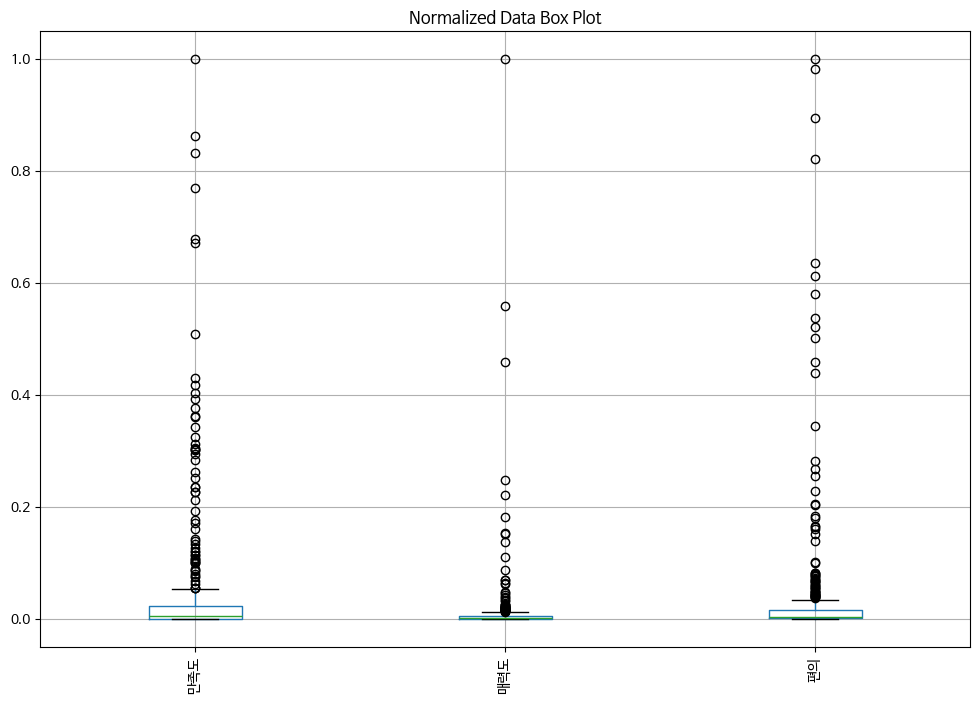

In [219]:
import matplotlib.pyplot as plt

# 박스 플롯 시각화
plt.figure(figsize=(12, 8))
Normalized_df_sc.boxplot()
plt.title('Normalized Data Box Plot')
plt.xticks(rotation=90)
plt.show()

### 정규화 x

In [221]:
Pivot_관광_all_No_Noml = Pivot_관광_all.copy()

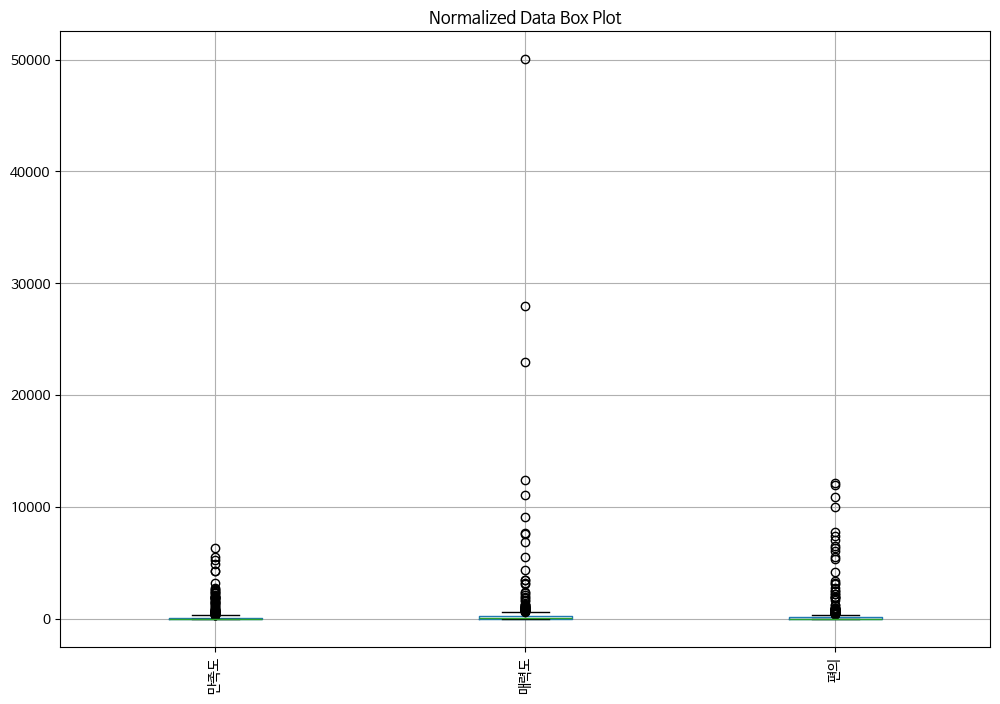

In [222]:
import matplotlib.pyplot as plt

# 박스 플롯 시각화
plt.figure(figsize=(12, 8))
Pivot_관광_all_No_Noml.boxplot()
plt.title('Normalized Data Box Plot')
plt.xticks(rotation=90)
plt.show()

In [223]:
Pivot_관광_all_No_Noml[:3]

Category_Map,만족도,매력도,편의
Attraction,,,
104고지전적비,63.0,228.0,72.0
10꼬르소꼬모 청담점,68.0,55.0,66.0
63아트,82.0,275.0,156.0


In [224]:
log_df = Pivot_관광_all_No_Noml.copy()

In [211]:
#log_df = log_df.reset_index()

count    352.000000
mean       0.035696
std        0.099093
min        0.000000
25%        0.001540
50%        0.004429
75%        0.015700
max        0.693147
Name: 편의_log, dtype: float64

In [225]:
import numpy as np
log_df['만족도_log'] = np.log1p(log_df['만족도'])
log_df['매력도_log'] = np.log1p(log_df['매력도'])
log_df['편의_log'] = np.log1p(log_df['편의'])

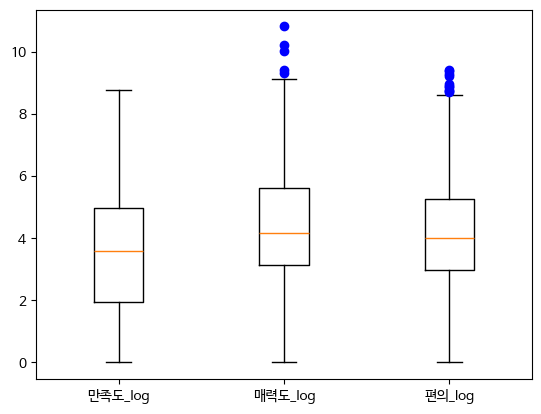

In [226]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots()  # 이 부분은 필요 없습니다.
# ax.boxplot()  # 이 부분도 필요 없습니다.

fig, ax = plt.subplots()

# 로그 변환된 데이터 배열을 박스 플롯에 전달합니다.
ax.boxplot([log_df['만족도_log'], log_df['매력도_log'], log_df['편의_log']], sym='bo')

# x축 레이블 설정
plt.xticks([1, 2, 3], ['만족도_log', '매력도_log', '편의_log'])

# 플롯 표시
plt.show()

In [228]:
log_df.describe()

Category_Map,만족도,매력도,편의,만족도_log,매력도_log,편의_log
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,328.721591,713.383523,514.227273,3.644353,4.419340,4.265887
std,838.497365,3508.298331,1588.257322,2.195921,1.842462,1.871565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,22.000000,18.750000,1.945910,3.135494,2.982909
50%,35.000000,63.500000,54.000000,3.583519,4.166635,4.007168
75%,145.250000,271.000000,192.500000,4.985209,5.605782,5.264798
max,6388.000000,50037.000000,12165.000000,8.762333,10.820538,9.406400


In [229]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [231]:
log_df.columns

Index(['만족도', '매력도', '편의', '만족도_log', '매력도_log', '편의_log'], dtype='object', name='Category_Map')

In [233]:
x_features = log_df[['만족도_log', '매력도_log', '편의_log']].values

In [234]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_features_sc = sc.fit_transform(x_features)

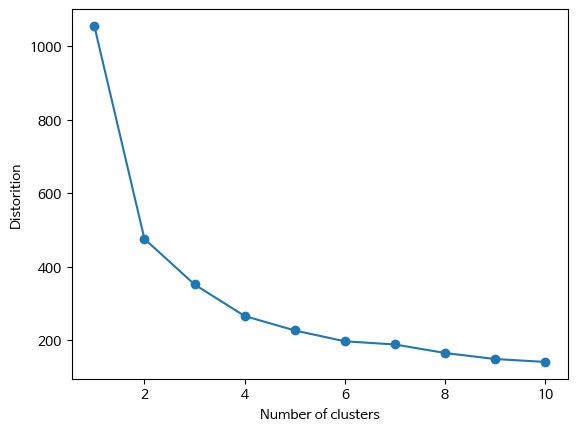

In [235]:
# Elbow

distortions = []

for i in range(1,11):
    kmeans_i = KMeans(n_clusters = i, random_state=42) #모델 생성
    kmeans_i.fit(x_features_sc) #모델 훈련(비지도학습 (라벨 x))
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distorition')

plt.show()

# kmeans_i.inertia_
# kmeans에서 각 cluster 중심(centroid)과 해당 클러스터에 속한 데이터 포인트 간 제곱 거리의 합
# inertia_가 최소화하는 방향으로 클러스터 형성
# 2-4

In [236]:
kmeans = KMeans(n_clusters = 3 , random_state=42)

In [237]:
y_labels = kmeans.fit_predict(x_features_sc) # 모델이 예측한 값만 존재

In [238]:
y_labels
# 클러스터(군집) 현재 3개니깐 >>> [0,1,2]

array([2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1,

In [239]:
log_df['cluster_label'] = y_labels

In [242]:
log_df['cluster_label'].value_counts()

cluster_label
0    155
2    123
1     74
Name: count, dtype: int64

### 결과 분석 및 시각화

In [243]:
# 최적의 K 찾기

# 실루엣 점수

from matplotlib import cm
def silhouetteviz(n_cluster, x_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)
    silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks=[]

    for c in range(n_cluster):
        c_silhouette = silhouette_values[y_labels == c]
        c_silhouette.sort()
        y_ax_upper += len(c_silhouette)
        color = cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette)
    silhouetter_avg = np.mean(silhouette_values)
    # print(silhouetter_avg)

    plt.axvline(silhouetter_avg, color='red', linestyle='--')
    plt.title('Number of Cluster: '+str(n_cluster)+'\n'\
              + 'Silhouette_score: ' +str(round(silhouetter_avg, 3)))

    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

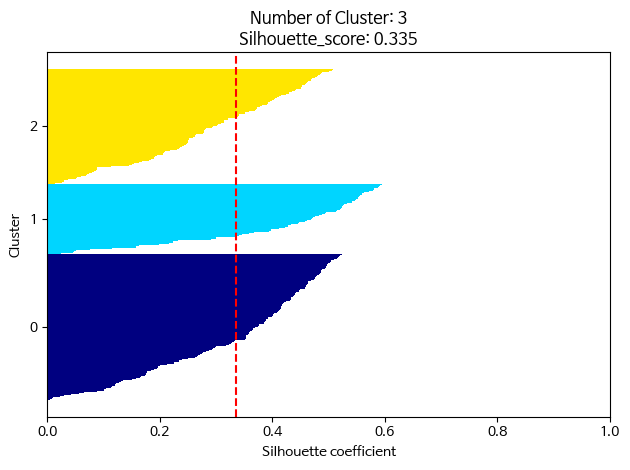

In [244]:
silhouetteviz(3, x_features_sc)

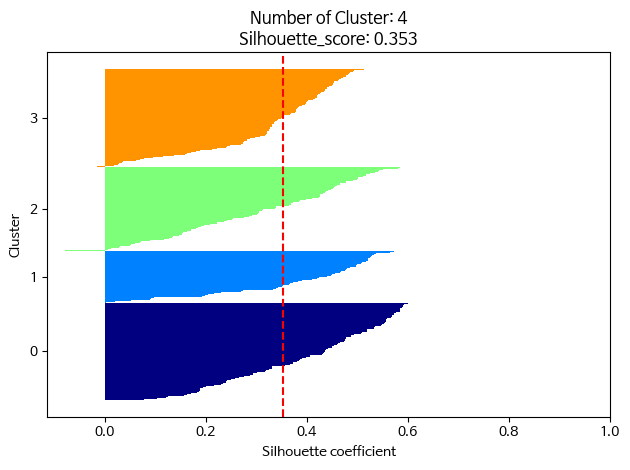

In [246]:
silhouetteviz(4, x_features_sc)

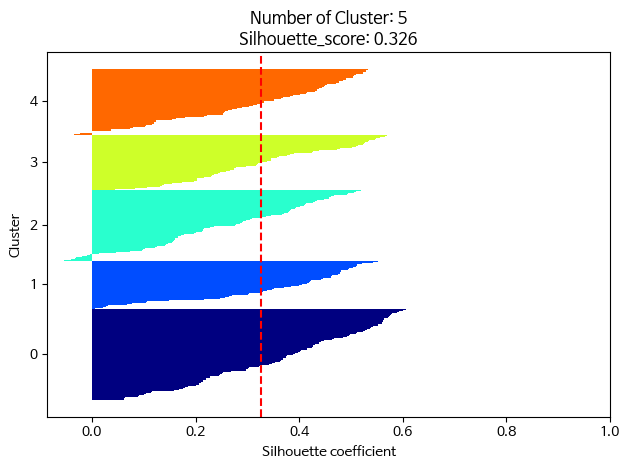

In [248]:
silhouetteviz(5, x_features_sc)

### Cluster 수에 따른 cluster 데이터 분포 시각화 함수

In [249]:
def clusterScatter(n_cluster, x_featrues):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        plt.scatter(x_features[y_labels ==i, 0], x_features[y_labels ==i, 1],
                    marker ='o', color=c_color, edgecolor='black' , s=50,
                    label='cluster'+str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

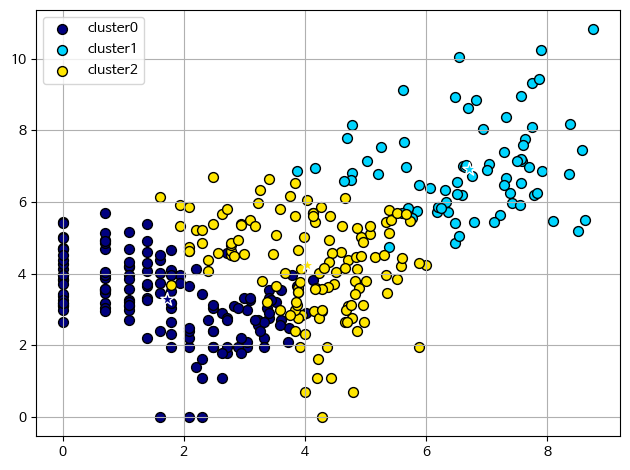

In [250]:
clusterScatter(3, x_features_sc) 

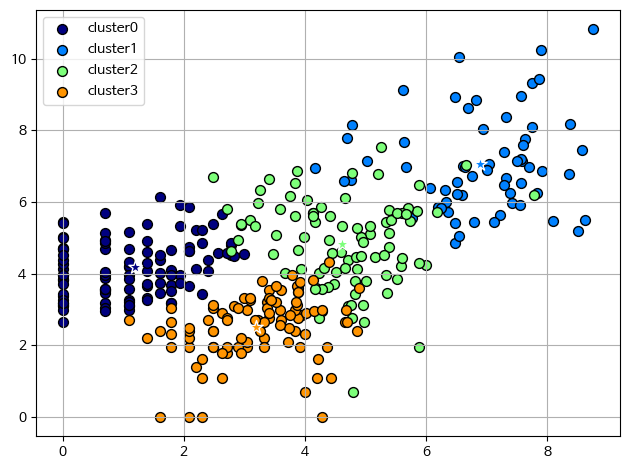

In [259]:
clusterScatter(4, x_features_sc) # 이거

In [258]:
kmeans.cluster_centers_.shape

(3, 3)

In [260]:
best_cluster = 4

kmeans = KMeans(n_clusters=best_cluster, random_state=42)
y_labels = kmeans.fit_predict(x_features_sc)

In [261]:
log_df['cluster_label'] = y_labels
log_df.head(3)

Category_Map,만족도,매력도,편의,만족도_log,매력도_log,편의_log,cluster_label
Attraction,,,,,,,
104고지전적비,63.0,228.0,72.0,4.158883,5.433722,4.290459,2
10꼬르소꼬모 청담점,68.0,55.0,66.0,4.234107,4.025352,4.204693,2
63아트,82.0,275.0,156.0,4.418841,5.620401,5.056246,2


In [262]:
log_df.value_counts()

만족도     매력도      편의       만족도_log   매력도_log    편의_log    cluster_label
5.0     23.0     21.0     1.791759  3.178054   3.091042  0                2
0.0     109.0    33.0     0.000000  4.700480   3.526361  0                2
61.0    298.0    122.0    4.127134  5.700444   4.812184  2                2
11.0    10.0     11.0     2.484907  2.397895   2.484907  3                2
98.0    99.0     158.0    4.595120  4.605170   5.068904  2                1
                                                                         ..
13.0    2.0      1.0      2.639057  1.098612   0.693147  3                1
12.0    96.0     41.0     2.564949  4.574711   3.737670  0                1
11.0    817.0    356.0    2.484907  6.706862   5.877736  2                1
        217.0    126.0    2.484907  5.384495   4.844187  2                1
6388.0  50037.0  12165.0  8.762333  10.820538  9.406400  1                1
Name: count, Length: 348, dtype: int64

In [263]:
df_cluster = pd.DataFrame(log_df['cluster_label'].value_counts())

In [264]:
df_cluster = df_cluster.reset_index()

In [265]:
df_cluster.index = df_cluster.index + 1

In [266]:
df_cluster

,cluster_label,count
1,3,105
2,0,103
3,2,89
4,1,55


### 클러스터 분석

In [268]:
log_df.columns

Index(['만족도', '매력도', '편의', '만족도_log', '매력도_log', '편의_log', 'cluster_label'], dtype='object', name='Category_Map')

In [269]:
log_df[:3]

Category_Map,만족도,매력도,편의,만족도_log,매력도_log,편의_log,cluster_label
Attraction,,,,,,,
104고지전적비,63.0,228.0,72.0,4.158883,5.433722,4.290459,2
10꼬르소꼬모 청담점,68.0,55.0,66.0,4.234107,4.025352,4.204693,2
63아트,82.0,275.0,156.0,4.418841,5.620401,5.056246,2


In [273]:
log_df_1 = log_df.reset_index().copy()

In [276]:
log_df_1.groupby('cluster_label')['Attraction'].count()

cluster_label
0    103
1     55
2     89
3    105
Name: Attraction, dtype: int64

In [280]:
Attraction_df = log_df_1.drop(['만족도_log', '매력도_log', '편의_log'], axis=1)
Attraction_df.head(3)

Category_Map,Attraction,만족도,매력도,편의,cluster_label
0,104고지전적비,63.0,228.0,72.0,2
1,10꼬르소꼬모 청담점,68.0,55.0,66.0,2
2,63아트,82.0,275.0,156.0,2


In [283]:
Attraction_df_group = Attraction_df.drop(['Attraction'], axis=1).groupby('cluster_label').mean()

In [306]:
Attraction_df_group_var = Attraction_df.drop(['Attraction'], axis=1).groupby('cluster_label').var()

In [284]:
Attraction_df_group.index = Attraction_df_group.index+1

In [307]:
Attraction_df_group_var.index = Attraction_df_group_var.index + 1

In [309]:
# 지수 >> 변환
pd.options.display.float_format = '{:.5f}'.format

In [299]:
cluster_label_0 = Attraction_df[Attraction_df['cluster_label'] == 0]
cluster_label_1 = Attraction_df[Attraction_df['cluster_label'] == 1]
cluster_label_2 = Attraction_df[Attraction_df['cluster_label'] == 2]
cluster_label_3 = Attraction_df[Attraction_df['cluster_label'] == 3]

In [298]:
cluster_label_1.shape

(55, 5)

In [304]:
cluster_label_2

Category_Map,Attraction,만족도,매력도,편의,cluster_label
0,104고지전적비,63.0,228.0,72.0,2
1,10꼬르소꼬모 청담점,68.0,55.0,66.0,2
2,63아트,82.0,275.0,156.0,2
3,AK PLAZA 홍대,575.0,303.0,471.0,2
15,강변스파랜드,218.0,114.0,964.0,2
...,...,...,...,...,...
331,한강시민공원 망원지구(망원한강공원),11.0,217.0,126.0,2
332,한강시민공원 잠원수영장,144.0,13.0,276.0,2
337,한성백제박물관,290.0,289.0,182.0,2
342,헬로애니멀,23.0,205.0,354.0,2


In [285]:
Attraction_df_group

Category_Map,만족도,매력도,편의
cluster_label,,,
1,3.912621,88.640777,51.854369
2,1638.345455,3938.181818,2787.927273
3,237.910112,265.449438,216.224719
4,38.323810,16.723810,29.400000


In [310]:
Attraction_df_group_var

Category_Map,만족도,매력도,편의
cluster_label,,,
1,21.11974,6600.68342,3401.28251
2,2135726.82290,67244314.89226,10039785.10572
3,188099.85546,82921.09116,37903.97165
4,1053.20183,175.06722,6240.78077
